# Haberman's Survival Data Set Analysis(EDA)

## Survival of patients who had undergone surgery for breast cancer


###  The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

 Number of Attributes: 4 (including the class attribute)


 - Age of patient at time of operation (numerical)
 - Patient's year of operation (year - 1900, numerical)
 - Number of positive axillary nodes detected (numerical)
 - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("haberman.csv")

In [2]:
print(dataset.shape)

(306, 4)


In [3]:
print(dataset.columns)

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [4]:
dataset["Surv_status"].value_counts()
#dataset["Op_Year"].value_counts()
#dataset["Age"].value_counts()
#dataset["axil_nodes_det"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

# 2-D Scatter Plot

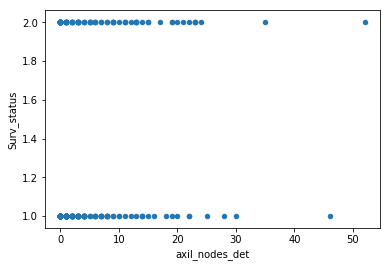

In [5]:
dataset.plot(kind='scatter',x='axil_nodes_det',y='Surv_status')
plt.show()

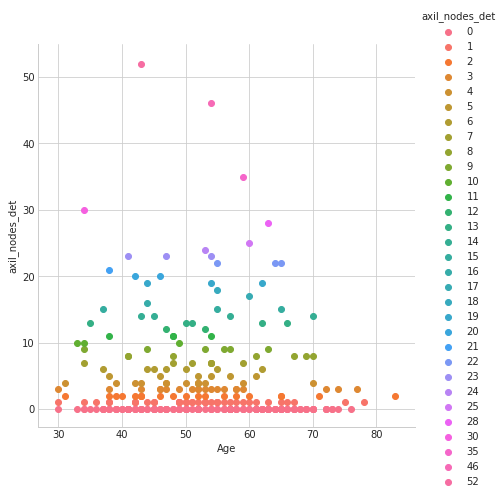

In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="axil_nodes_det", size=6)\
   .map(plt.scatter, "Age", "axil_nodes_det")\
   .add_legend();
plt.show();

# Pair-plot

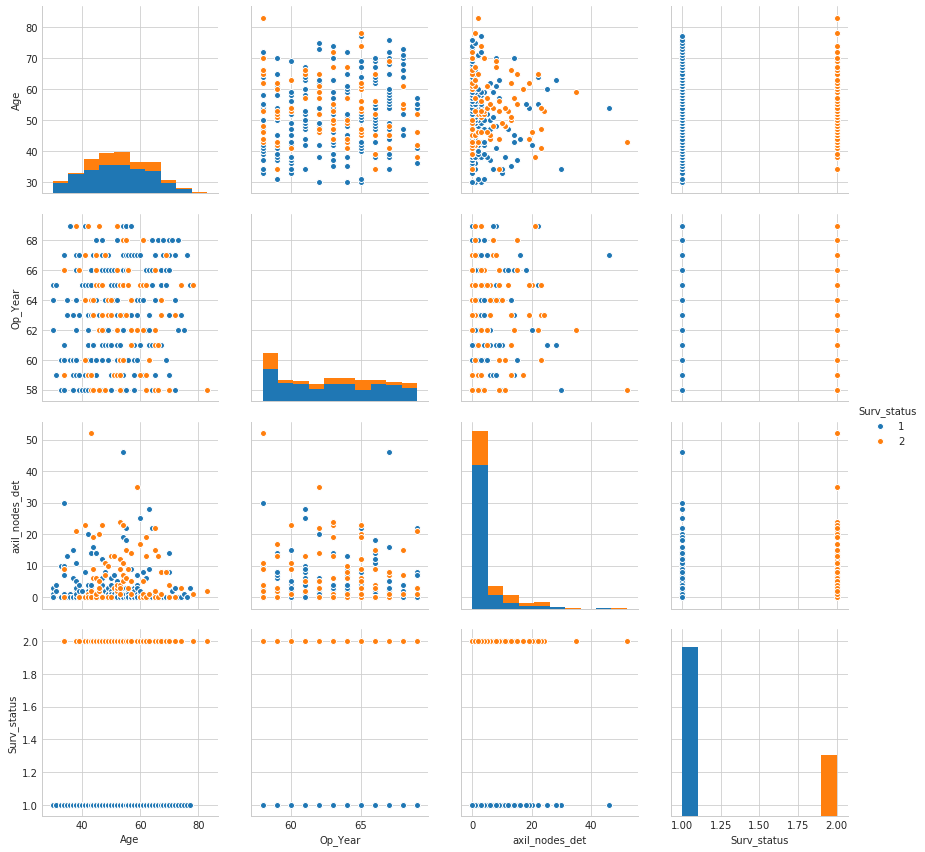

In [7]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="Surv_status", size=3);
plt.show();

/home/shivam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/shivam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


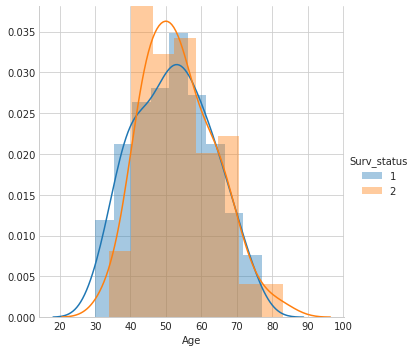

In [8]:
plt.close();
sns.FacetGrid(dataset, hue="Surv_status", size=5)\
   .map(sns.distplot, "Age")\
   .add_legend();


/home/shivam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/shivam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


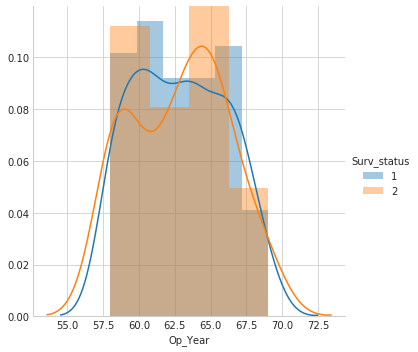

In [9]:
plt.close();
sns.FacetGrid(dataset, hue="Surv_status", size=5)\
   .map(sns.distplot, "Op_Year")\
   .add_legend();


/home/shivam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/shivam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


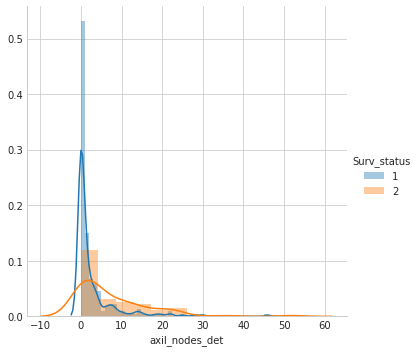

In [10]:
plt.close();
sns.FacetGrid(dataset, hue="Surv_status", size=5)\
   .map(sns.distplot, "axil_nodes_det")\
   .add_legend();

#hence we could see that No._of_axil_nodes_detected plays an important role in the survival of the patient

# 3d Histogram: PDF, CDF

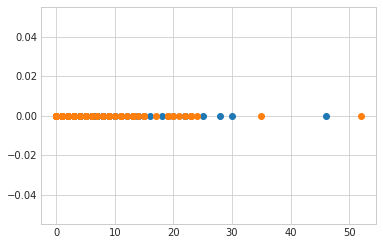

In [11]:
survive=dataset.loc[dataset["Surv_status"]==1]
not_survive=dataset.loc[dataset["Surv_status"]==2]

plt.plot(survive["axil_nodes_det"], np.zeros_like(survive['axil_nodes_det']), 'o')
plt.plot(not_survive["axil_nodes_det"], np.zeros_like(not_survive['axil_nodes_det']), 'o')

plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


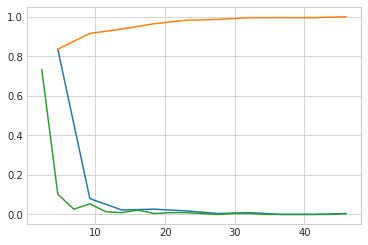

In [12]:
counts, bin_edges= np.histogram(survive['axil_nodes_det'], bins=10, density=True)

pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(survive['axil_nodes_det'], bins=20, 
                                 density = True)
#print(pdf)
#print(bin_edges)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


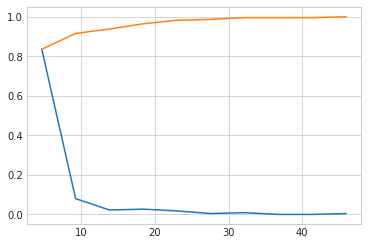

In [13]:
counts, bin_edges = np.histogram(survive['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


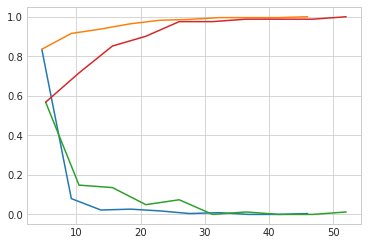

In [14]:
# Patients who would die after 5 years
counts, bin_edges = np.histogram(survive['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Patients who would die before 5 years
counts, bin_edges = np.histogram(not_survive['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# Explaination for the character selection

From the above CDF plots we can observe that:
- The Person with high number of axillary nodes have less probablity of surviving.
- Maximum no of persons who survived have less than 3 axillary nodes.
- For the classification of survival status of person.
- Year_of_the_operation is the least important attribute

#  Mean, Variance and Std-dev

In [15]:
print("Means:")
print(np.mean(survive["axil_nodes_det"]))
#Mean with an outlier.
print(np.mean(np.append(survive["axil_nodes_det"],50)));
print(np.mean(not_survive["axil_nodes_det"]))

print("\nStd-dev:");
print(np.std(survive["axil_nodes_det"]))
print(np.std(not_survive["axil_nodes_det"]))


Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


# Median, Percentile, Quantile, IQR, MAD

In [16]:
print("\nMedians:")
print(np.median(survive["axil_nodes_det"]))
#Median with an outlier
print(np.median(np.append(survive["axil_nodes_det"],50)));
print(np.median(not_survive["axil_nodes_det"]))

print("\nQuantiles:")
print(np.percentile(survive["axil_nodes_det"],np.arange(0, 100, 25)))
print(np.percentile(not_survive["axil_nodes_det"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survive["axil_nodes_det"],90))
print(np.percentile(not_survive["axil_nodes_det"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survive["axil_nodes_det"]))
print(robust.mad(not_survive["axil_nodes_det"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Box plot and Whiskers

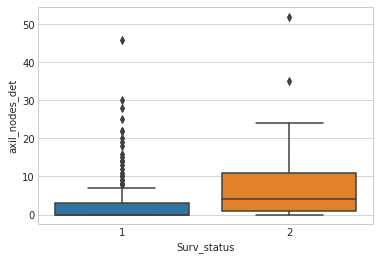

In [17]:
sns.boxplot(x='Surv_status',y='axil_nodes_det', data=dataset)
plt.show()

# Violin plots

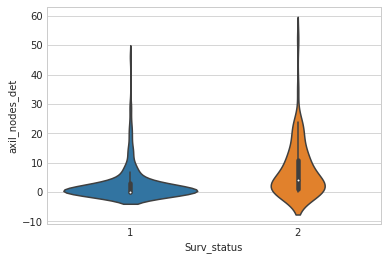

In [18]:
sns.violinplot(x='Surv_status', y='axil_nodes_det', data=dataset, size=8)
plt.show();

# Multivariate probability density, contour plot.

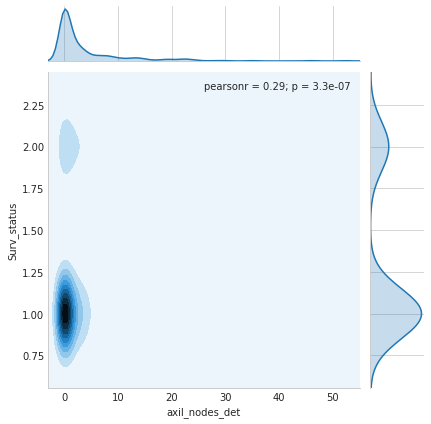

In [19]:
#2D Density plot, contors-plot
sns.jointplot(x="axil_nodes_det", y="Surv_status", data=dataset, kind="kde");
plt.show();

# Conclusion

By Exploratory Data Analysis on the Haberman's Survival DataSet we could conclude that:

- No of person who posess high no of axillary nodes indicates that they have high probablity of Not surviving.
- Axillary nodes is most important feature/attribute to predict the survival status of person.
- The person with 0 axillary node is most likely to be survive.
- The least usefull attribute to predict the survival status of person is 'year of operation'.
- Most of the persons who performed surgery were between 40-60 years of age.
- The majority of the surgeries were performed between 1960 - 1966.